In [1]:
from cgmbrush.cgmbrush import *
from cgmbrush.plots.plots import *
import matplotlib.pyplot as plt
import math

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
XBIG_SIZE = 20
axis_fontsize = 20
curve_thickness = 2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

date = '2021-11-01'


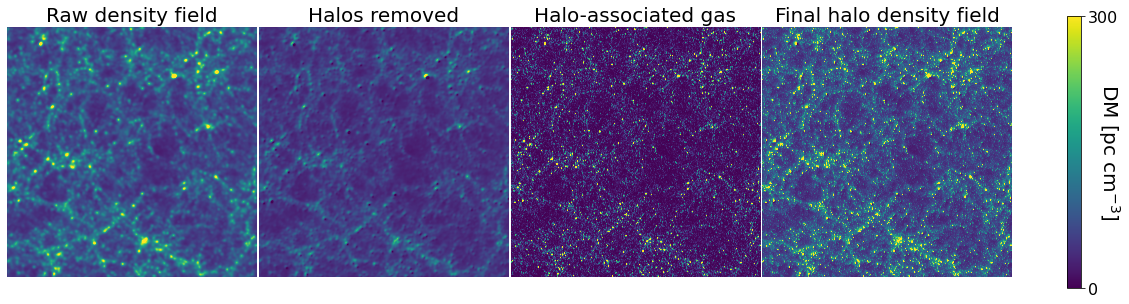

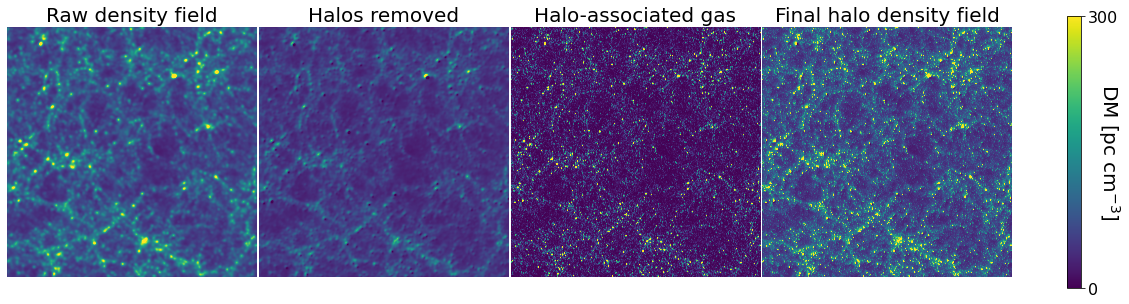

In [2]:
c = Configuration(SphericalTophatProfile(), 1, resolution=32, provider=BolshoiProvider())
c.datestamp = date
c.run(load_from_files=True)

original_field = c.provider.get_density_field(0, c.den_grid_size)
removed_field = c.get_removed_field()[0]
added_field = c.get_addition_field()[0]
final_field = c.get_final_field()[0]

algorithm_stages_plot(original_field, removed_field, added_field, final_field, c.den_grid_size)

In [4]:
resolution = 32

c_STH2 = Configuration(SphericalTophatProfile(), 2, resolution=resolution, provider=BolshoiProvider())
c_STH2.datestamp = date
STH2 = c_STH2.get_final_field()[0]

c_NFW = Configuration(NFWProfile(), 2, resolution=resolution, provider=BolshoiProvider())
c_NFW.datestamp = date
NFW = c_NFW.get_final_field()[0]

c_FIRE = Configuration(FireProfile(), 1, resolution=resolution, provider=BolshoiProvider())
c_FIRE.datestamp = date
FIRE = c_FIRE.get_final_field()[0]

c_P = Configuration(PrecipitationProfile(), 1, resolution=resolution, provider=BolshoiProvider())
c_P.datestamp = date
PRE = c_P.get_final_field()[0]


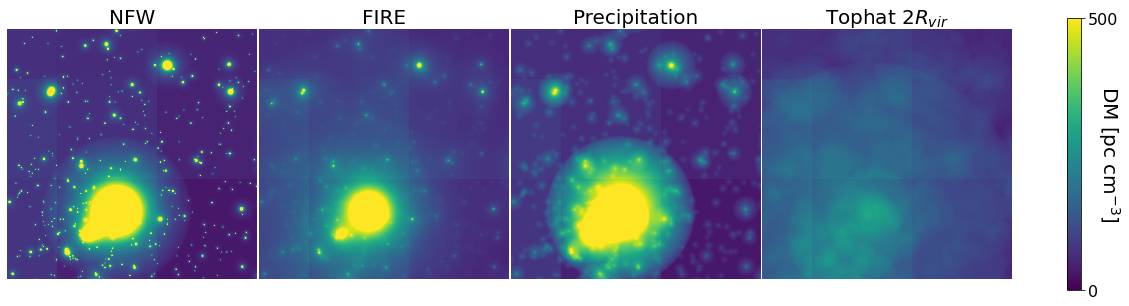

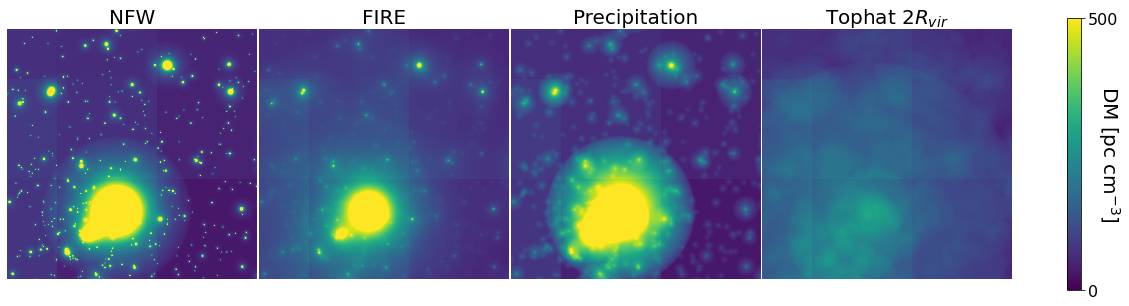

In [6]:
u = 10 * resolution
vmin = 0
vmax = 500
filename = "implot_add_remove_halos_256_all.pdf"

fields_comparison_plot([('NFW', NFW[0:u,0:u]), ('FIRE', FIRE[0:u,0:u]), ('Precipitation', PRE[0:u,0:u]), ('Tophat $2R_{vir}$', STH2[0:u,0:u])], vmin, vmax, filename)
